<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/4.%20%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.%20BatchNormalization()%20%D0%B8%20Dropout()/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B9_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%2C_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_BatchNormalization()_%D0%B8_Dropout().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 1.2. Визуализируйте несколько изображений из датасета:


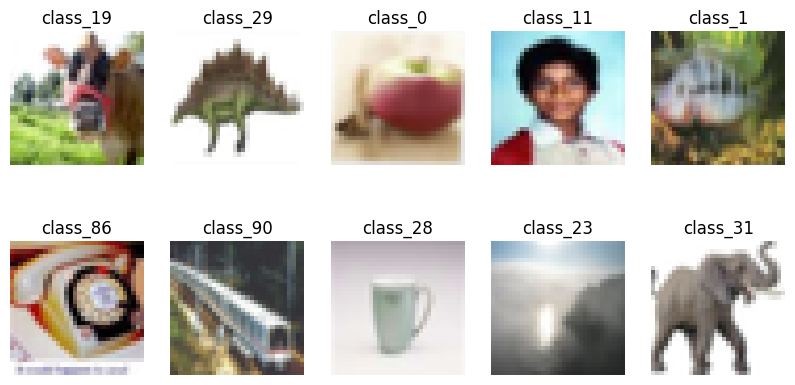

In [ ]:
# Ваш код #
class_names = ["class_" + str(i) for i in range(100)]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

### 1.3. Произведите нормализацию данных:

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(100, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model_1.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,372 (1.03 MB)

 Trainable params: 270,372 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Обучите созданную модель

In [ ]:
history_1 = model_1.fit(x_train, y_train,
                      batch_size=64,
                      epochs=15,
                      validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 93ms/step - accuracy: 0.0459 - loss: 4.2759 - val_accuracy: 0.1543 - val_loss: 3.5384
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.1804 - loss: 3.3915 - val_accuracy: 0.2341 - val_loss: 3.1366
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.2491 - loss: 3.0110 - val_accuracy: 0.2829 - val_loss: 2.9226
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.3022 - loss: 2.7501 - val_accuracy: 0.2982 - val_loss: 2.8375
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.3400 - loss: 2.5615 - val_accuracy: 0.3270 - val_loss: 2.6654
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.3775 - loss: 2.3954 - val_accuracy: 0.3534 - val_loss: 2.5553
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.4025 - loss: 2.2548 - val_accuracy: 0.3762 - val_loss: 2.4698
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.4320 - loss: 2.1246 - 

### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(256))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(128))
model_2.add(Dense(100))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))


optimizer = Adam(learning_rate=0.001)
model_2.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,796 (1.04 MB)

 Trainable params: 271,084 (1.03 MB)

 Non-trainable params: 712 (2.78 KB)

Обучите созданную модель

In [ ]:
history_2 = model_2.fit(x_train, y_train,
                      batch_size=64,
                      epochs=15,
                      validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.1316 - loss: 3.8825 - val_accuracy: 0.1754 - val_loss: 3.4512
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 89ms/step - accuracy: 0.2963 - loss: 2.9535 - val_accuracy: 0.2050 - val_loss: 3.4824
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.3518 - loss: 2.6282 - val_accuracy: 0.2561 - val_loss: 3.1363
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.3941 - loss: 2.3933 - val_accuracy: 0.2938 - val_loss: 3.0182
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4315 - loss: 2.2190 - val_accuracy: 0.3342 - val_loss: 2.7514
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.4619 - loss: 2.0807 - val_accuracy: 0.2499 - val_loss: 3.4933
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4851 - loss: 1.9641 - val_accuracy: 0.3452 - val_loss: 2.7386
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5067 - loss: 1.8468 - 

### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model_3.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,372 (1.03 MB)

 Trainable params: 270,372 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Обучите созданную модель

In [ ]:
history_3 = model_3.fit(x_train, y_train,
                      batch_size=64,
                      epochs=15,
                      validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 91ms/step - accuracy: 0.0239 - loss: 4.4432 - val_accuracy: 0.0921 - val_loss: 3.8868
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.0934 - loss: 3.8569 - val_accuracy: 0.1810 - val_loss: 3.4111
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.1581 - loss: 3.4970 - val_accuracy: 0.2245 - val_loss: 3.2188
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.2008 - loss: 3.2753 - val_accuracy: 0.2578 - val_loss: 3.0180
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.2336 - loss: 3.0933 - val_accuracy: 0.2808 - val_loss: 2.8649
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.2624 - loss: 2.9446 - val_accuracy: 0.3071 - val_loss: 2.7541
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.2876 - loss: 2.8234 - val_accuracy: 0.3218 - val_loss: 2.6930
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.3129 - loss: 2.6996 - 

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model_4.add(Dropout(0.25))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(64, kernel_size=(3, 3)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, kernel_size=(3, 3)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.5))
model_4.add(Flatten())
model_4.add(Dense(256))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dense(128))
model_4.add(Activation('relu'))
model_4.add(Dense(100))
model_4.add(BatchNormalization())
model_4.add(Activation("softmax"))

optimizer = Adam(learning_rate=0.001)
model_4.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
model_4.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 100)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,796 (1.04 MB)

 Trainable params: 271,084 (1.03 MB)

 Non-trainable params: 712 (2.78 KB)

Обучите созданную модель

In [ ]:
history_4 = model_4.fit(x_train, y_train,
                      batch_size=64,
                      epochs=15,
                      validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.0617 - loss: 4.3616 - val_accuracy: 0.1360 - val_loss: 3.7832
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.1878 - loss: 3.4662 - val_accuracy: 0.1169 - val_loss: 4.0879
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.2551 - loss: 3.0973 - val_accuracy: 0.2081 - val_loss: 3.3252
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.2829 - loss: 2.9065 - val_accuracy: 0.2509 - val_loss: 3.1293
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.3171 - loss: 2.7401 - val_accuracy: 0.2644 - val_loss: 3.0520
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.3307 - loss: 2.6497 - val_accuracy: 0.2478 - val_loss: 3.1522
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.3511 - loss: 2.5666 - val_accuracy: 0.3223 - val_loss: 2.7096
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.3607 - loss: 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_path = 'drive/MyDrive/neural_networks/4lab/'

Mounted at /content/drive


In [ ]:
model_1.save(drive_path + 'model_1.keras')e
model_2.save(drive_path + 'model_2.keras')
model_3.save(drive_path + 'model_3.keras')
model_4.save(drive_path + 'model_4.keras')

### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

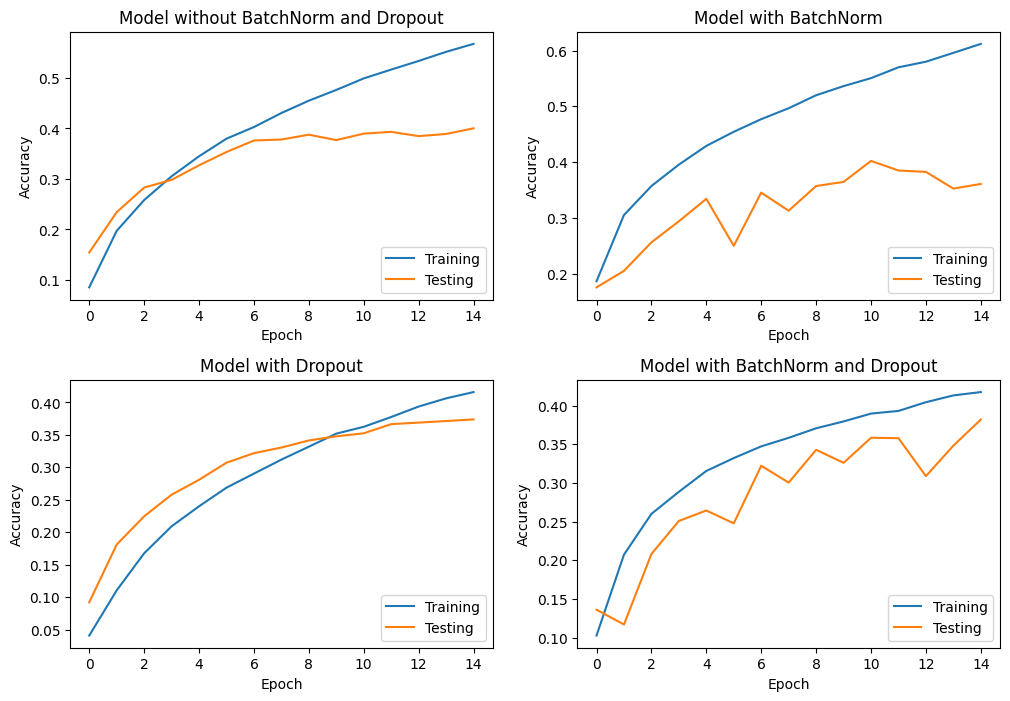

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training')
plt.plot(history_1.history['val_accuracy'], label='Testing')
plt.title('Model without BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training')
plt.plot(history_2.history['val_accuracy'], label='Testing')
plt.title('Model with BatchNorm')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.plot(history_3.history['accuracy'], label='Training')
plt.plot(history_3.history['val_accuracy'], label='Testing')
plt.title('Model with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(history_4.history['accuracy'], label='Training')
plt.plot(history_4.history['val_accuracy'], label='Testing')
plt.title('Model with BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.3)

plt.show()

Ваши выводы

Ваш итог

### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def visualize_act_map(model, img_input):
    """
    Универсальная функция для визуализации активаций сверточных слоев.

    Args:
        model: Модель Keras (Sequential или Functional)
        img_input: Входное изображение или батч изображений
    """
    # Убеждаемся, что входные данные представлены в правильной размерности
    if len(np.array(img_input).shape) == 3:
        img_input = np.expand_dims(img_input, axis=0)

    # Конвертируем входные данные в тензор
    input_tensor = tf.convert_to_tensor(img_input)

    # Обрабатываем входные данные по слоям, не создавая новую модель
    x = input_tensor

    # Находим и визуализируем карты активации сверточных слоев
    for layer in model.layers:
        # Применяем слой напрямую
        x = layer(x)

        # Визуализируем, если это сверточный или пулинговый слой
        if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
            # Конвертируем активации в numpy-массив
            activation = x.numpy()

            n_features = activation.shape[-1]
            print(f"Визуализация слоя: {layer.name}, форма: {activation.shape}")

            # Настраиваем размеры сетки
            cols = min(16, n_features)
            rows = (n_features + cols - 1) // cols

            # Создаем фигуру
            plt.figure(figsize=(cols * 1.5, rows * 1.5))
            plt.suptitle(f'Активации слоя {layer.name}', fontsize=16)

            # Отображаем каждую карту признаков
            for j in range(n_features):
                plt.subplot(rows, cols, j + 1)

                # Получаем карту признаков
                feature_map = activation[0, :, :, j]

                # Нормализуем для лучшей визуализации
                mean = feature_map.mean()
                std = feature_map.std()

                if std > 0:
                    feature_map = (feature_map - mean) / std

                # Ограничиваем значения для лучшей визуализации
                feature_map = np.clip(feature_map, -3, 3)

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{j}')
                plt.axis('off')

            plt.tight_layout(rect=[0, 0, 1, 0.95])
            plt.show()


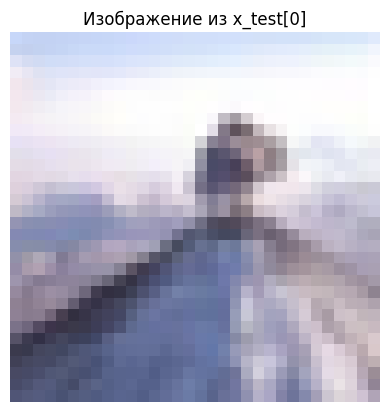

In [ ]:
import matplotlib.pyplot as plt

image = x_test[0]

# Если изображение в градациях серого (например, MNIST)
plt.imshow(image)

plt.axis('off')
plt.title("Изображение из x_test[0]")
plt.show()


Визуализация слоя: conv2d_9, форма: (1, 30, 30, 32)


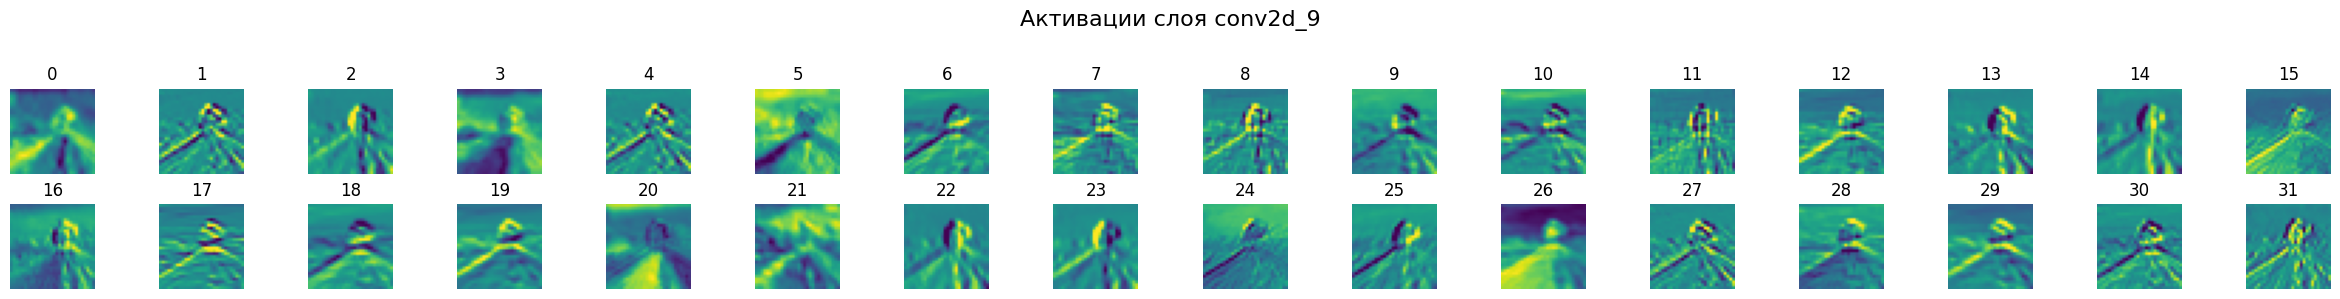

Визуализация слоя: max_pooling2d_9, форма: (1, 15, 15, 32)


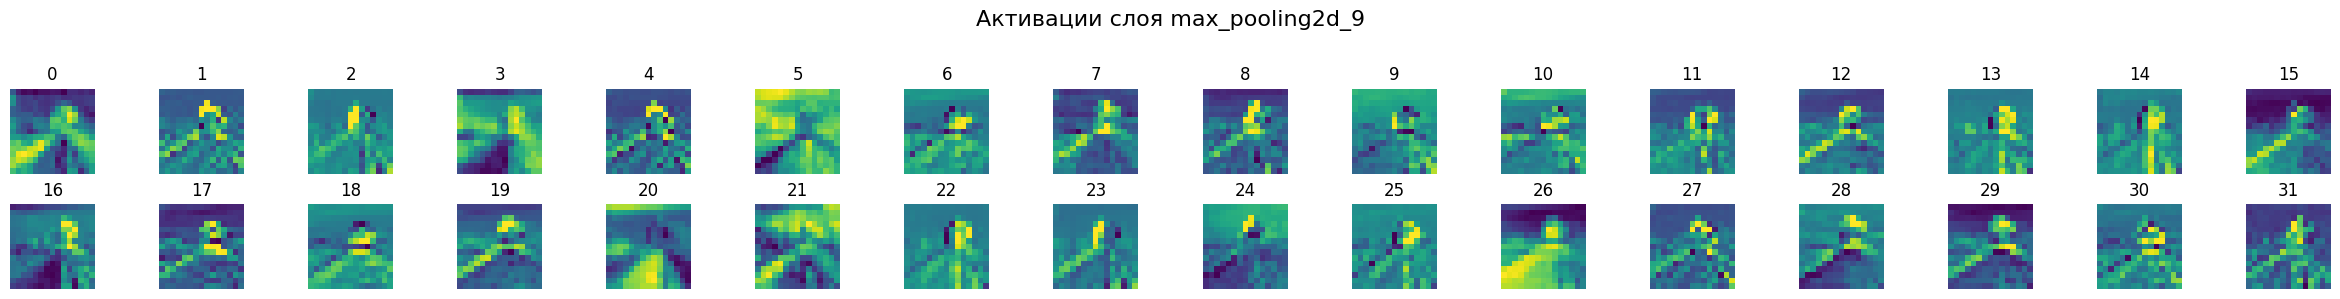

Визуализация слоя: conv2d_10, форма: (1, 13, 13, 64)


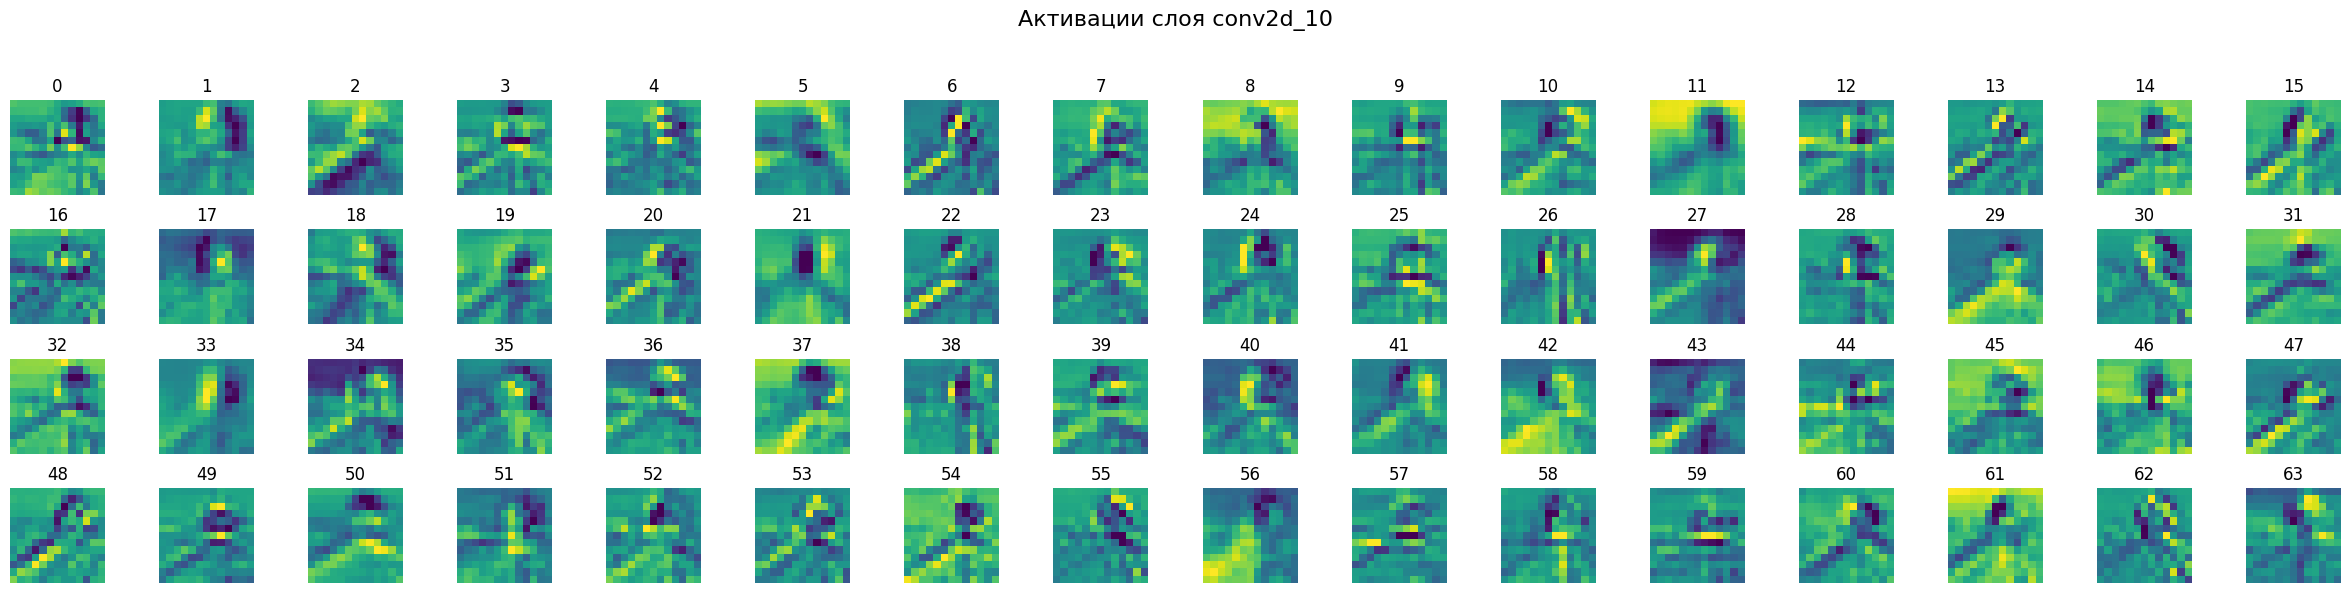

Визуализация слоя: max_pooling2d_10, форма: (1, 6, 6, 64)


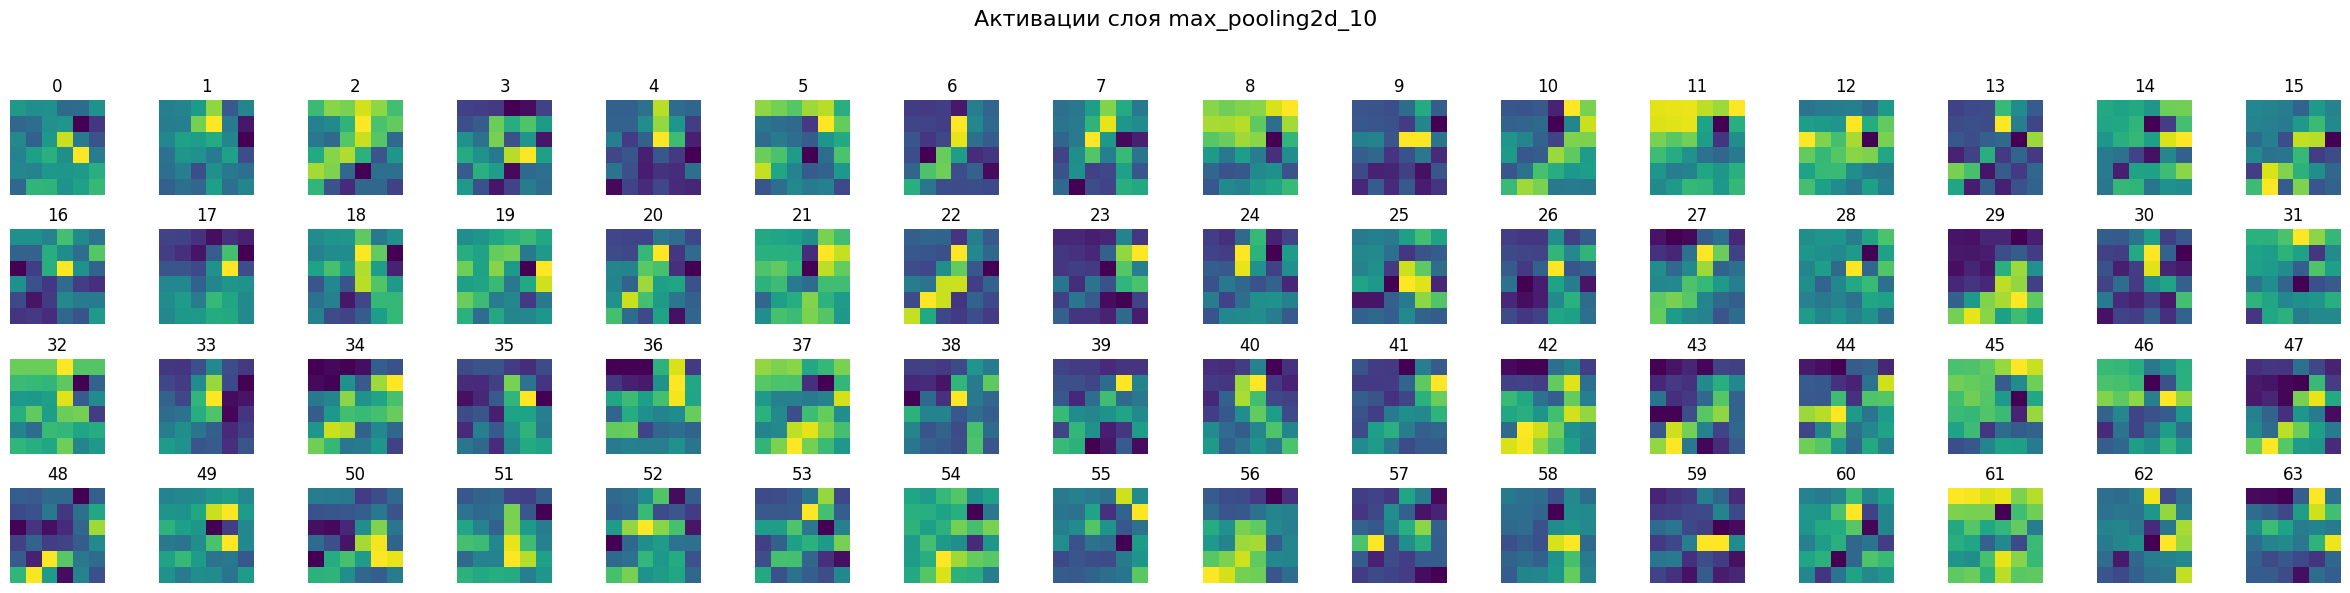

Визуализация слоя: conv2d_11, форма: (1, 4, 4, 128)


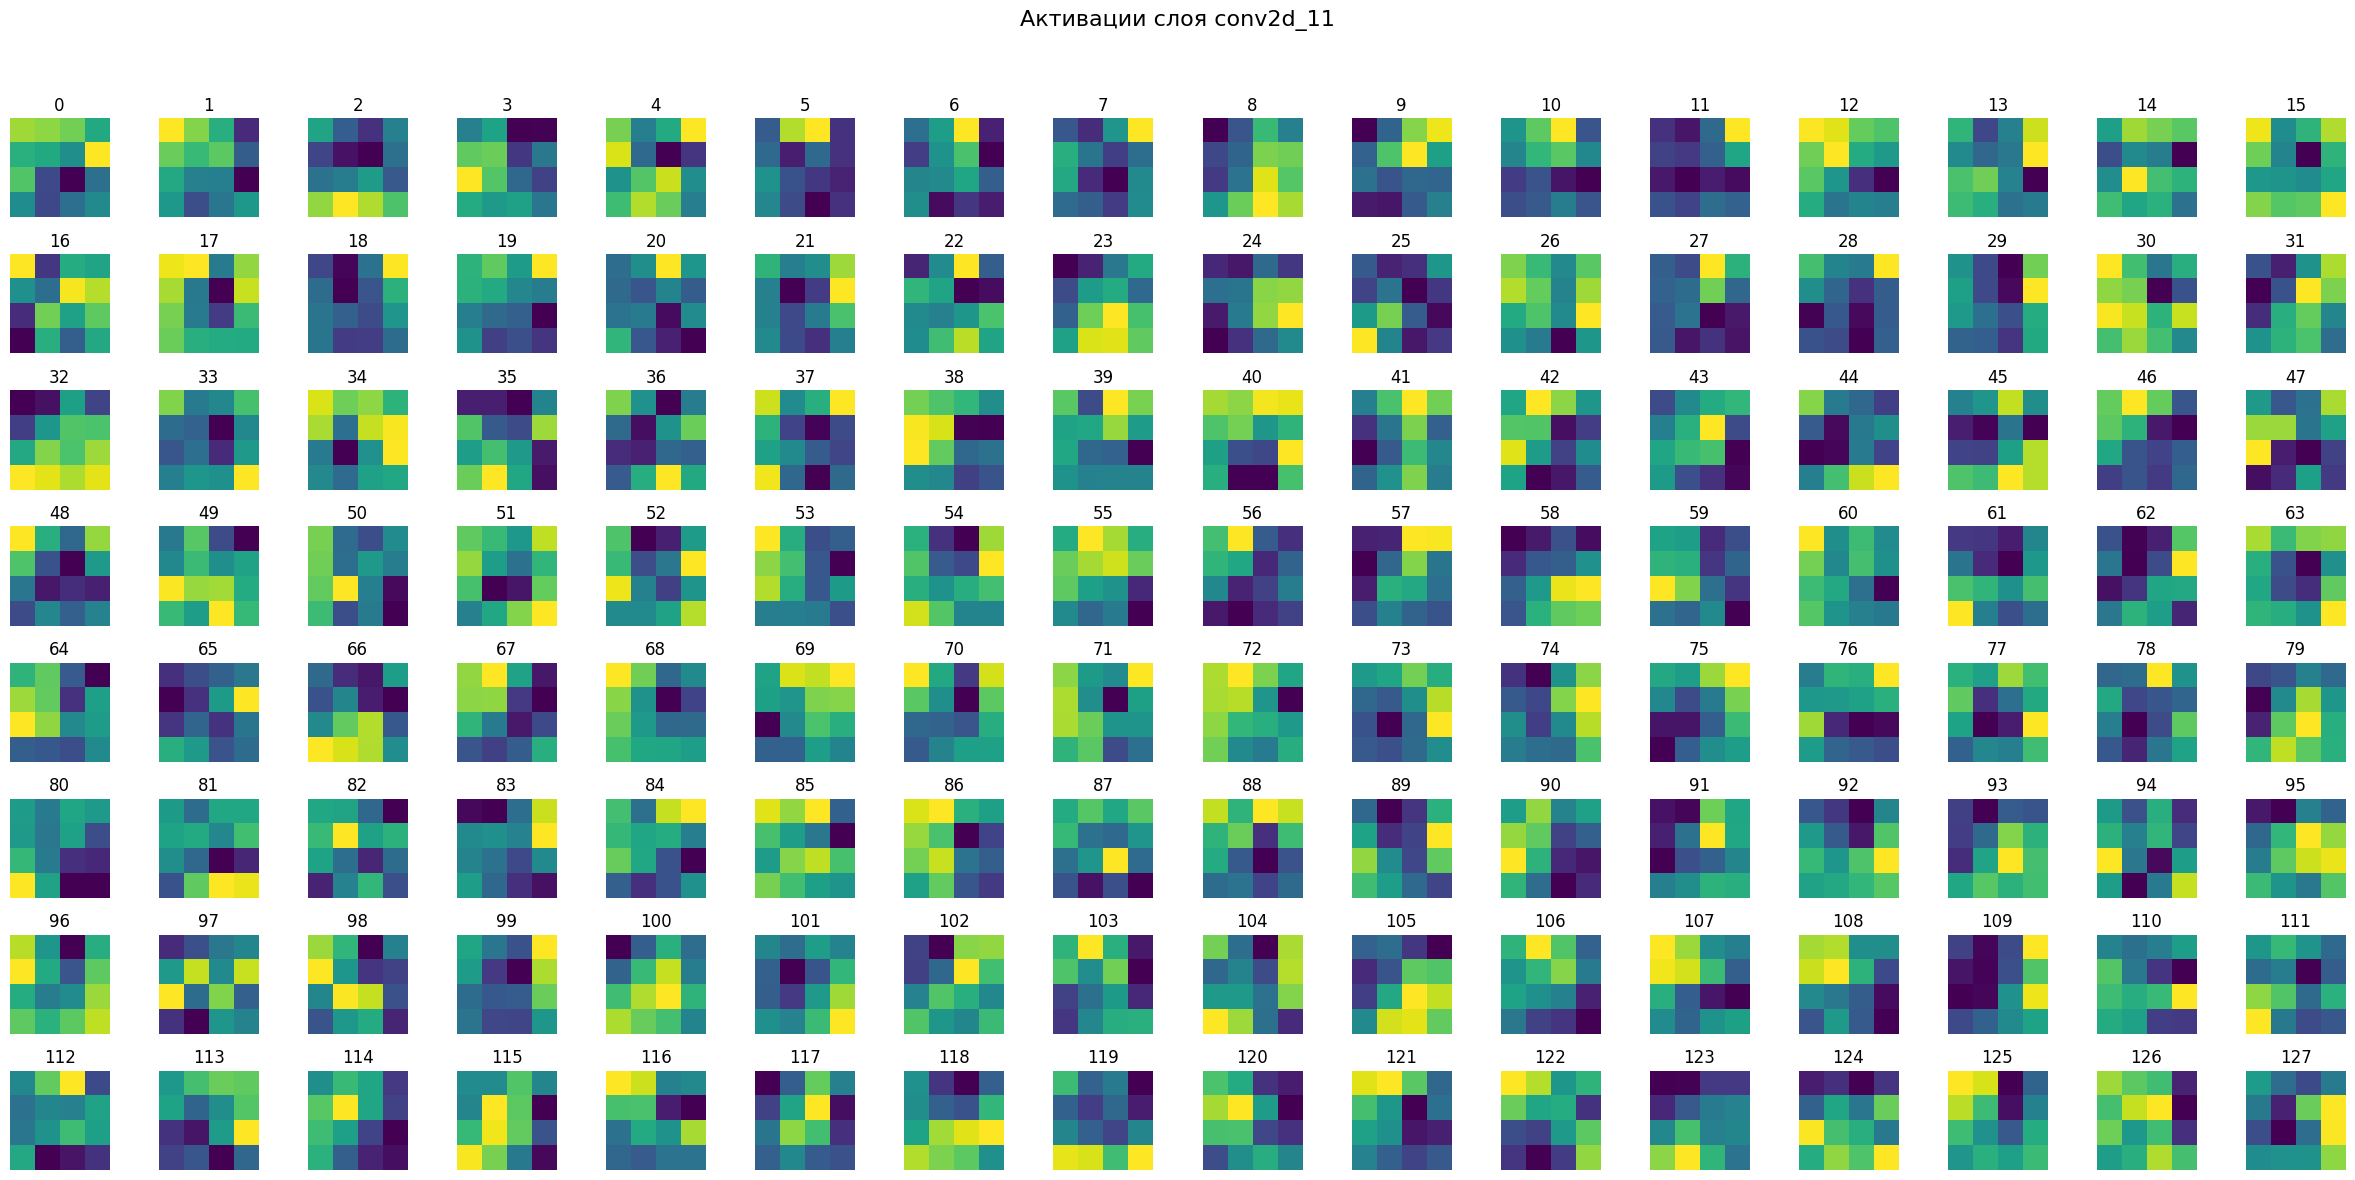

Визуализация слоя: max_pooling2d_11, форма: (1, 2, 2, 128)


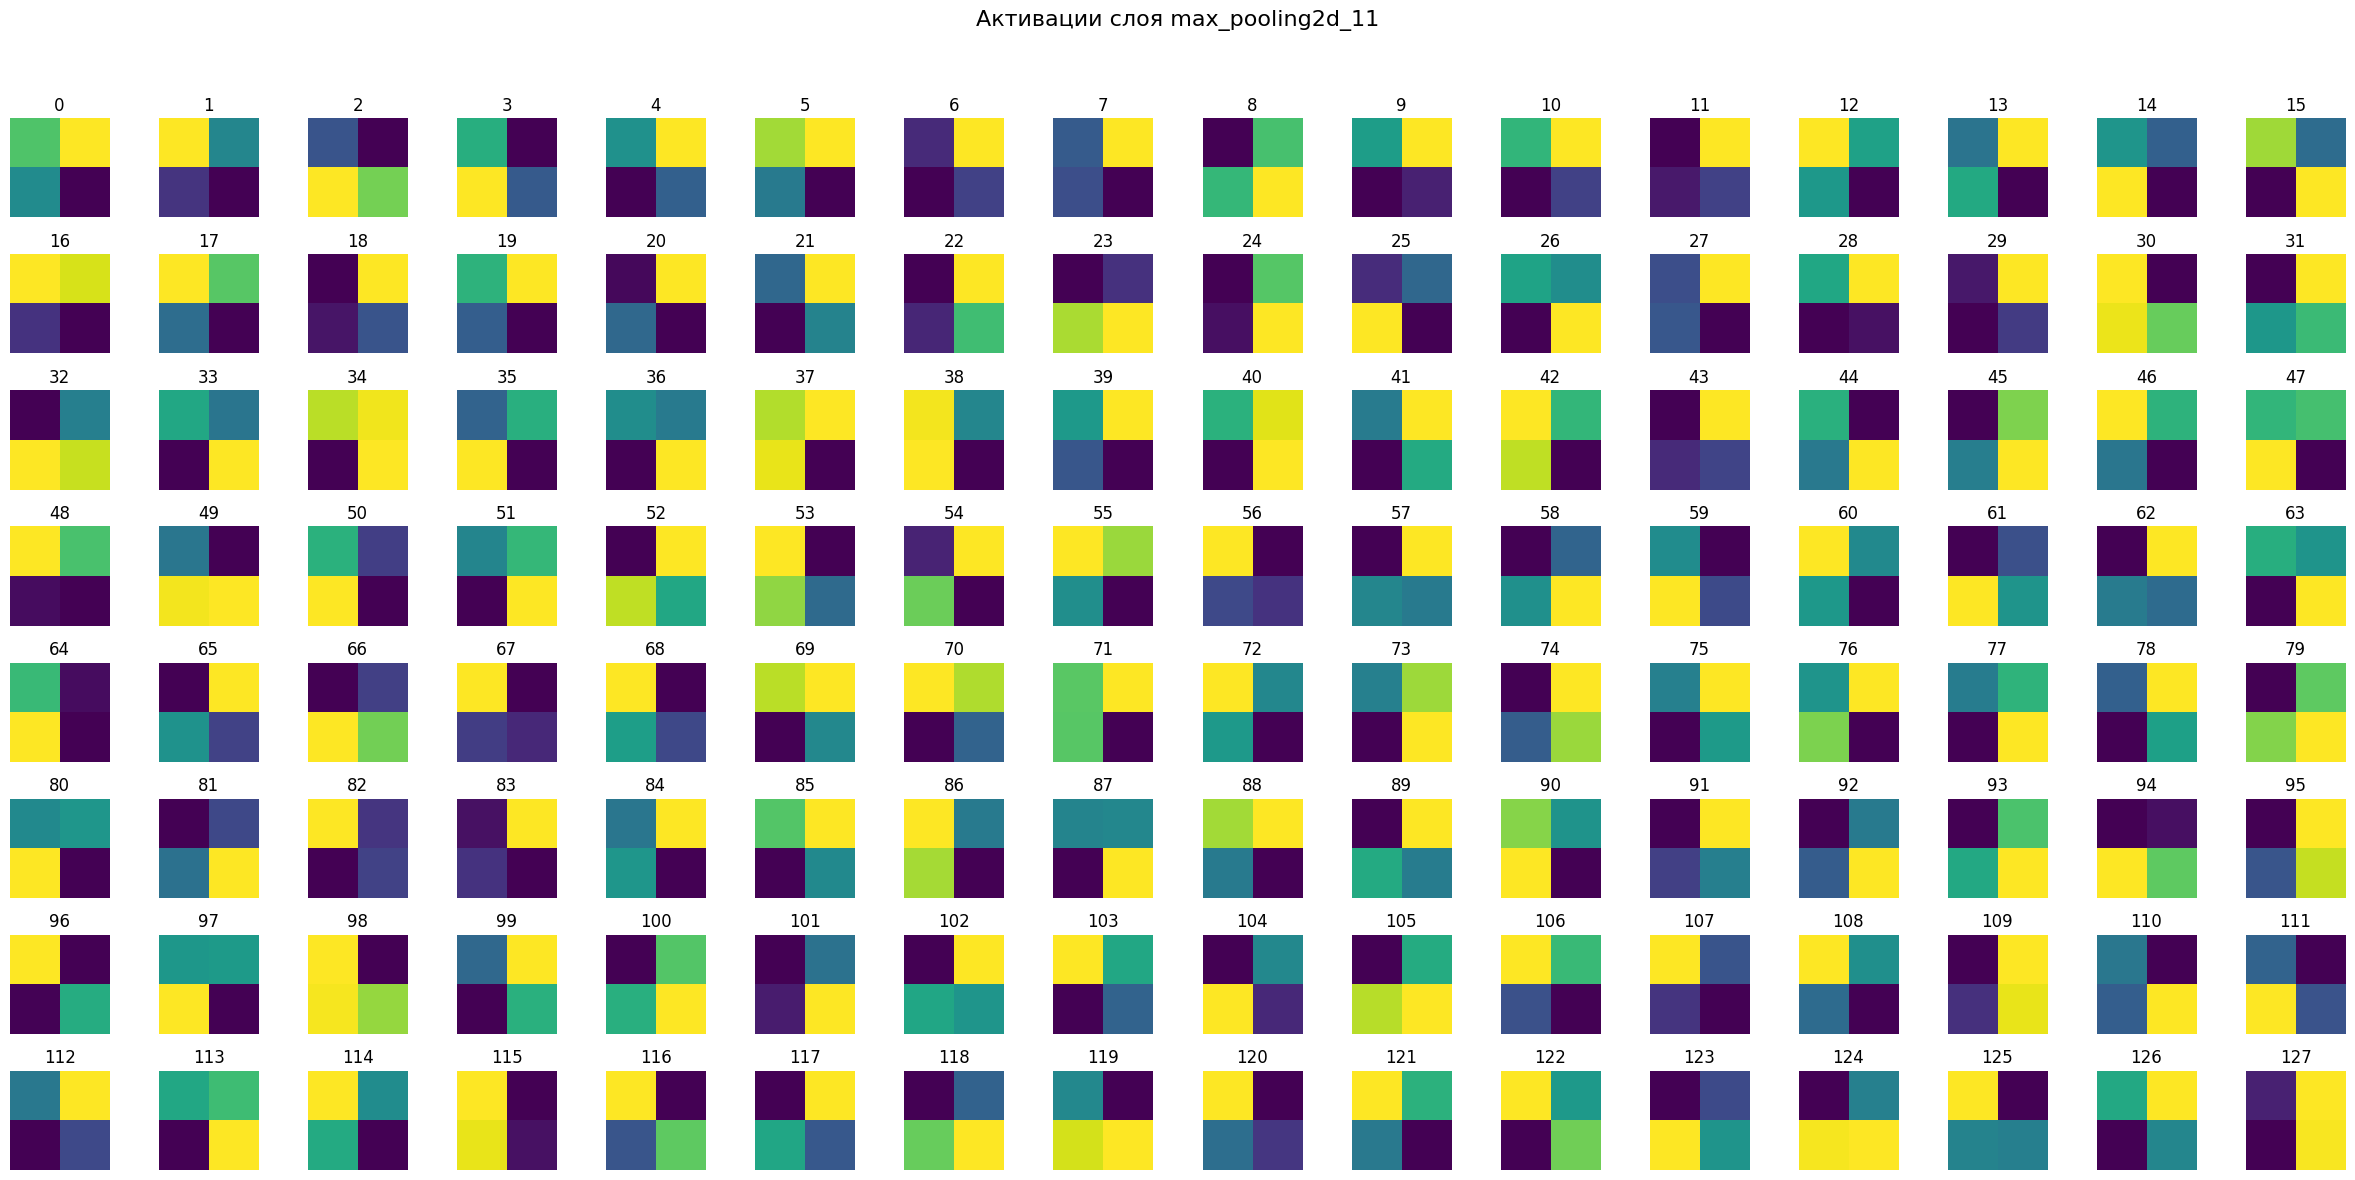

In [ ]:
visualize_act_map(model_4, x_test[0:1])

## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [ ]:
import zipfile
import os

zip_path = 'drive/MyDrive/neural_networks/dataset.zip'
extract_dir = '.'

# Создаем папку для распаковки, если её нет
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dir = 'dataset'
classes = ['cars', 'motorbike', 'bus']
img_size = (128, 128)

X = []
y = []

for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        # Пропускаем скрытые файлы и не-JPG файлы
        if img_name.startswith('.') or not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            X.append(np.array(img))
            y.append(class_idx)
        except Exception as e:
            print(f"Ошибка при обработке {img_path}: {e}")
            continue

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_with_batchnorm = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_with_batchnorm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_with_batchnorm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,795 (12.61 MB)

 Trainable params: 3,305,411 (12.61 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history = model_with_batchnorm.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.4426 - loss: 3.5823 - val_accuracy: 0.3083 - val_loss: 10.6138
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4989 - loss: 1.0070 - val_accuracy: 0.2767 - val_loss: 9.0706
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5247 - loss: 1.0140 - val_accuracy: 0.4433 - val_loss: 3.0238
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.5731 - loss: 0.9307 - val_accuracy: 0.5850 - val_loss: 6.9435
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6099 - loss: 0.8474 - val_accuracy: 0.6200 - val_loss: 3.9016
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6530 - loss: 0.8210 - val_accuracy: 0.7217 - val_loss: 0.6988
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6771 - loss: 0.7424 - val_accuracy: 0.5450 - val_loss: 1.4468
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6866 - loss: 0.7563 - val_accuracy: 0.7150 - v

In [ ]:
model_with_batchnorm.save(drive_path + 'car_bus_mt_bn.keras')

In [ ]:
visualize_act_map(model_with_batchnorm, X_test[0:1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import cv2

models = {
    "3lab": load_model("drive/MyDrive/neural_networks/3lab/car_mt_bus.keras"),
    "2lab": load_model("drive/MyDrive/neural_networks/2lab/2lab_car_mt_bus.keras"),
    "with_batchnorm": load_model(drive_path + 'car_bus_mt_bn.keras')
}

def predict_with_all_models(img_path, models):
    """Предсказывает класс для изображения используя все модели"""
    try:
        # Загрузка изображения
        img = image.load_img(img_path)
        img_array = image.img_to_array(img) / 255.0

        # Классы
        classes = {0: 'car', 1: 'motorbike', 2: 'bus'}

        # Получаем предсказания
        results = []
        for model_name, model in models.items():
            try:
                if model_name == "2lab":
                    img_processed = cv2.resize(img_array, (64, 64)).reshape(1, -1)
                else:
                    img_processed = cv2.resize(img_array, (128, 128))
                    img_processed = np.expand_dims(img_processed, axis=0)

                pred = model.predict(img_processed, verbose=0)
                class_idx = np.argmax(pred[0])
                confidence = np.max(pred[0])
                results.append(f"{model_name}: {classes[class_idx]} ({confidence:.2%})")

            except Exception as e:
                print(f"Ошибка в модели {model_name}: {str(e)}")
                continue

        print("\nРезультаты классификации:")
        for res in results:
            print(f"- {res}")

        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        return results

    except Exception as e:
        print(f"Ошибка обработки {img_path}: {str(e)}")
        return None

# Получаем все изображения
image_extensions = ('.jpg', '.jpeg', '.JPG', '.JPEG')
image_path = os.path.join("drive/MyDrive/neural_networks/3lab/", "15_test")
image_files = [os.path.join(image_path, f) for f in os.listdir(image_path)
              if f.lower().endswith(image_extensions) and os.path.isfile(os.path.join(image_path, f))]

# Обрабатываем все изображения
for img_path in sorted(image_files):
    predict_with_all_models(img_path, models)

Output hidden; open in https://colab.research.google.com to view.